<a href="https://colab.research.google.com/github/IvnGenza/Data-Science/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import pickle

In [ ]:
path = "/content/car_evaluation.csv"
df = pd.read_csv(path)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.tail()

,Unnamed: 0,buying,maint,door,persons,lug_boot,safety,class
1723,1723,low,low,5more,more,med,med,good
1724,1724,low,low,5more,more,med,high,vgood
1725,1725,low,low,5more,more,big,low,unacc
1726,1726,low,low,5more,more,big,med,good
1727,1727,low,low,5more,more,big,high,vgood


In [ ]:
df[df.duplicated()]

,Unnamed: 0,buying,maint,door,persons,lug_boot,safety,class


In [ ]:
#Remove useless first column

df = df.drop(df.columns[0], axis=1)

In [ ]:
df.info()

In [ ]:
# Print value of every category in every feature

for column in df.columns:
    counts = df[column].value_counts()
    print(counts)
    print('------------')

As we can see, target column ('class') is imbalanced (most of our samples have value 0).

In order to properly train the models, we must balance the weights.

In [ ]:
df.isnull().sum()

buying      0
maint       0
door        0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
#Label encoding for every feature

df['buying'] = df['buying'].replace({'low':0,'med':1,'high':2,'vhigh':3})
df['maint'] = df['maint'].replace({'low':0,'med':1,'high':2,'vhigh':3})
df['door'] = df['door'].replace({'2':0,'3':1,'4':2,'5more':3})
df['persons'] = df['persons'].replace({'2':0,'4':1,'more':2})
df['lug_boot'] = df['lug_boot'].replace({'small':0,'med':1,'big':2})
df['safety'] = df['safety'].replace({'low':0,'med':1,'high':2})
df['class'] = df['class'].replace({'unacc':0,'acc':1,'good':2,'vgood':3})

In [ ]:
X = df.drop('class', axis = 1)
y = df['class']

In [ ]:
X

,buying,maint,door,persons,lug_boot,safety
0,3,3,0,0,0,0
1,3,3,0,0,0,1
2,3,3,0,0,0,2
3,3,3,0,0,1,0
4,3,3,0,0,1,1
...,...,...,...,...,...,...
1723,0,0,3,2,1,1
1724,0,0,3,2,1,2
1725,0,0,3,2,2,0
1726,0,0,3,2,2,1


**feature importance**

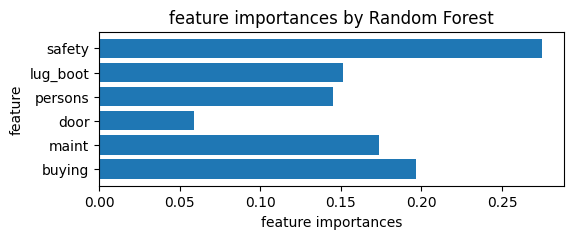

In [ ]:
RF = RandomForestClassifier(class_weight='balanced')
RF.fit(X,y)

importances = RF.feature_importances_

plt.figure(figsize=(6, 2))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), X.columns)
plt.xlabel('feature importances')
plt.ylabel('feature')
plt.title('feature importances by Random Forest')
plt.show()

- 'door' is must useless feature

In [ ]:
#del X['lug_boot']
del X['door']
#del X['persons']
#del X['maint']

In [ ]:
for column in X.columns:
    counts = X[column].value_counts()
    print(counts)
    print('------------')

3    432
2    432
1    432
0    432
Name: buying, dtype: int64
------------
3    432
2    432
1    432
0    432
Name: maint, dtype: int64
------------
0    576
1    576
2    576
Name: persons, dtype: int64
------------
0    576
1    576
2    576
Name: lug_boot, dtype: int64
------------
0    576
1    576
2    576
Name: safety, dtype: int64
------------


In [ ]:
X = df.drop('class', axis = 1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
def ConfusionM_visualization(matrix,l):
  plt.figure(figsize=(5, 4))
  Confusion_Matrix_df = pd.DataFrame(matrix)
  sns.heatmap(Confusion_Matrix_df, annot=True, linewidths=1, fmt="d", cbar=False)
  plt.title(l)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")

In [ ]:
y_train.value_counts()

0    813
1    255
2     49
3     40
Name: class, dtype: int64

# **DecisionTreeClassifier**

Accuracy train set -->  0.9118409680207433
Accuracy test set -->  0.9141856392294221


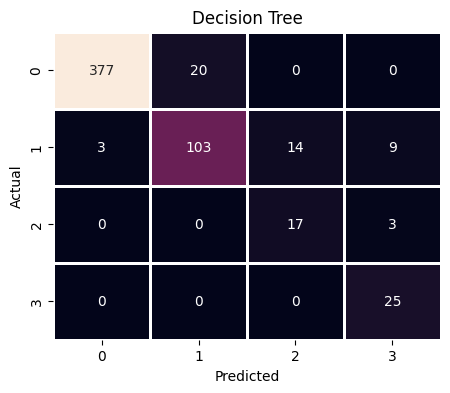

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion= 'gini', max_depth = 6, class_weight='balanced')
DT.fit(X_train,y_train)



# test set accuracy
y_pred = DT.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)

# Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)

# train set accuracy
y_pred = DT.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred)

print('Accuracy train set --> ',accuracy_train)
print('Accuracy test set --> ',accuracy_test)
ConfusionM_visualization(c_matrix, 'Decision Tree')

**Decision Tree visualisation**

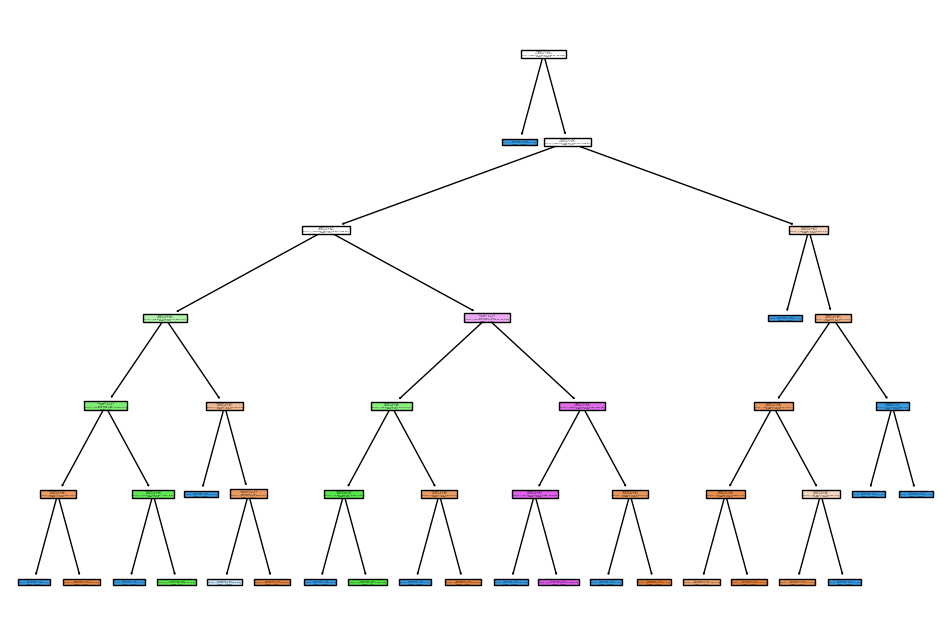

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(DT, filled=True, feature_names=X.columns, class_names=df['class'].unique())
plt.show()

# **RandomForestClassifier**

Accuracy train is: -->  0.8452895419187554
Accuracy test is: -->  0.8633975481611208


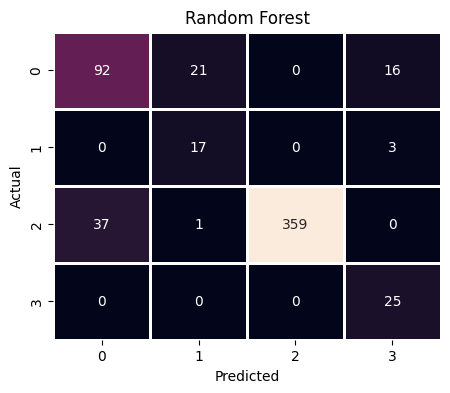

In [ ]:
RF = RandomForestClassifier(max_depth = 4, n_estimators = 100, class_weight='balanced')
RF.fit(X_train,y_train)



# test set accuracy
y_pred = RF.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)

# Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)

# train set accuracy
y_pred = RF.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred)

print('Accuracy train is: --> ',accuracy_train)
print('Accuracy test is: --> ',accuracy_test)
ConfusionM_visualization(c_matrix, 'Random Forest')

In [ ]:
output = open('RandomForestClassifier.pkl', 'wb')
pickle.dump(RF, output)
output.close()

# **XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

X = df.drop('class', axis = 1)
y = df['class'].replace({'acc':0,'good':1,'unacc':2,'vgood':3})

#del X['lug_boot']
del X['door']
#del X['buying']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 599 to 83
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    571 non-null    int64
 1   maint     571 non-null    int64
 2   persons   571 non-null    int64
 3   lug_boot  571 non-null    int64
 4   safety    571 non-null    int64
dtypes: int64(5)
memory usage: 26.8 KB


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157 entries, 48 to 1126
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1157 non-null   int64
 1   maint     1157 non-null   int64
 2   persons   1157 non-null   int64
 3   lug_boot  1157 non-null   int64
 4   safety    1157 non-null   int64
dtypes: int64(5)
memory usage: 54.2 KB


In [ ]:
print('scale_pos_weight for class 0 >>>', round(1728/(4*384),1))
print('scale_pos_weight for class 1 >>>', round(1728/(4*69),1))
print('scale_pos_weight for class 2 >>>', round(1728/(4*1210),1))
print('scale_pos_weight for class 3 >>>', round(1728/(4*65),1))

Getting weights of classes from y_train

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

XGBClassifier model

Accuracy train is: -->  0.9040622299049266
Accuracy test is: -->  0.9141856392294221


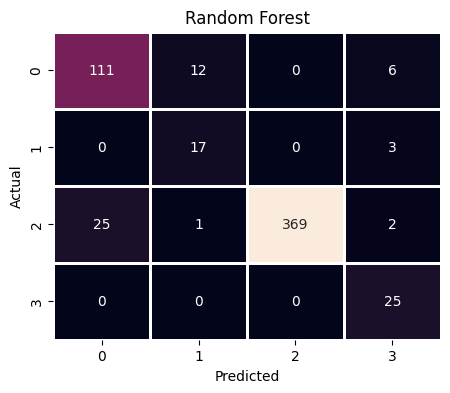

In [ ]:
from xgboost import XGBClassifier


#sample_weights={0: 1.1, 1: 6.3, 2: 0.4, 3: 6.6}


XGB = XGBClassifier(max_depth= 1, n_estimators = 200, subsample = 0.9, objective='multi:softmax', num_class = 4)
XGB.fit(X_train, y_train, sample_weight = sample_weights)


# test set accuracy
y_pred = XGB.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)

# Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)

# train set accuracy
y_pred = XGB.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred)

print('Accuracy train is: --> ',accuracy_train)
print('Accuracy test is: --> ',accuracy_test)
ConfusionM_visualization(c_matrix, 'Random Forest')

In [ ]:
output = open('XGBClassifier.pkl', 'wb')
pickle.dump(XGB, output)
output.close()

**DMatrix**

Accuracy train is: -->  0.8997407087294728
Accuracy test is: -->  0.9089316987740805


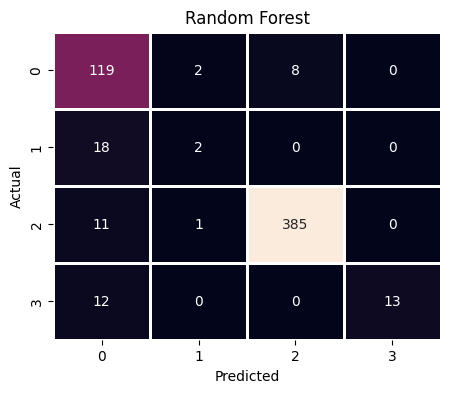

In [ ]:
# from xgboost import XGBClassifier

# dtrain = XGBClassifier.DMatrix(X_train, label=y_train)
# dtest = XGBClassifier.DMatrix(X_test)

# params = {
#     'objective': 'multi:softmax',
#     'num_class': 4,
#     'max_depth':3,
#     'subsample' : 0.9}


# XGB = XGBClassifier.train(params, dtrain)


# # test set accuracy
# y_pred = XGB.predict(dtest)
# accuracy_test = accuracy_score(y_test, y_pred)

# # Confusion matrix
# c_matrix = confusion_matrix(y_test, y_pred)

# # train set accuracy
# y_pred = XGB.predict(dtrain)
# accuracy_train = accuracy_score(y_train, y_pred)

# print('Accuracy train is: --> ',accuracy_train)
# print('Accuracy test is: --> ',accuracy_test)
# ConfusionM_visualization(c_matrix, 'Random Forest')

**RandomUnderSampler/RandomOverSampler**

In [ ]:
# from xgboost import XGBClassifier
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

# undersampler = RandomOverSampler(random_state=42)
# X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)


# XGB = XGBClassifier(max_depth= 3, n_estimators = 200, subsample = 0.9, objective='multi:softmax', num_class = 4)
# XGB.fit(X_train_resampled, y_train_resampled)


# # test set accuracy
# y_pred = XGB.predict(X_test)
# accuracy_test = accuracy_score(y_test, y_pred)

# # Confusion matrix
# c_matrix = confusion_matrix(y_test, y_pred)

# # train set accuracy
# y_pred = XGB.predict(X_train_resampled)
# accuracy_train = accuracy_score(y_train_resampled, y_pred)

# print('Accuracy train is: --> ',accuracy_train)
# print('Accuracy test is: --> ',accuracy_test)
# ConfusionM_visualization(c_matrix, 'Random Forest')